In [3]:
# pip install keras
# pip install -q -U keras-tuner
# pip install streamlit-drawable-canvas
# pip install lazypredict

import matplotlib.pyplot as plt  
%matplotlib inline
import pandas as pd 
import numpy as np
import mnist
from IPython.display import Image
from time import time
import time

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score 
import lazypredict
from lazypredict.Supervised import LazyClassifier
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pickle 

# Keras
import kerastuner as kt
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Reshape, BatchNormalization
from keras.utils import to_categorical
from keras import backend as K

C:\Users\13mck\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# Reading in train and test data provided by Kaggle.
data=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

28x28 matrix for 784 pixels, each row is a different handwritten digit, pixel-value is an integer between 0 and 255 (lighter to darker)

In [3]:
# Printing the training data and data types. 
print(data.dtypes)
data

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The original training data consists of 42000 rows and 785 columns. Each row respresents a image of one handwritten digit. The first column indicates the hardwritten digit in the image and each subsequent column represents a pixle in the image. Each image is 28 pixels in height and 28 pixels in width resulting in a total of 784 pixels. A visual representation of how the pixels are organized and expressed will be demonstrated.

In [4]:
# Printing the test data and data types. The test data will only be used to train models. 
print(test.dtypes)
test

pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 784, dtype: object


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The orginal test data consists of 28000 rows and 784 columns. Each row respresents a image of one handwritten digit and each column represents a pixle in the image. 

The Kaggle competition data desciption explains that pixel values in the columns are integers between and including 0 and 255. The larger the value, the darker the pixel. 

Since there is a known set min and max value, the values can be normalized (converted to values between 0 and 1).

In [5]:
# Converting to float to allow for decimals. 
cols_data = (data.iloc[:,1:].values).astype('float32')  # Converting the 2nd to 785th column of the train data. 
digits_data = data.iloc[:,0].values # Just the handwritten digit of the train data.
final_test = test.values.astype('float32')  # Converting the 1st to 784th column of the test data. 

# Normalizing the pixel values. Normalization allows the CNN to converge faster.
cols_data = cols_data / 255
final_test = final_test / 255
cols_data = cols_data.reshape(42000, 28, 28)
final_test = final_test.reshape(28000, 28, 28)


Checking the number of each digit in the training set. Since the counts are relatively even, no stratification is needed.

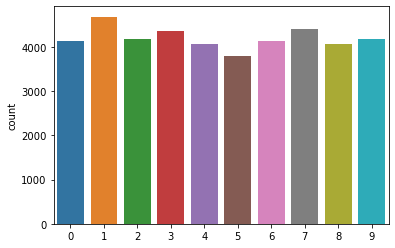

In [350]:
sns.countplot(digits_data)

To visually demonstrate how the pixel values form an image, print out the first 4 rows/images.

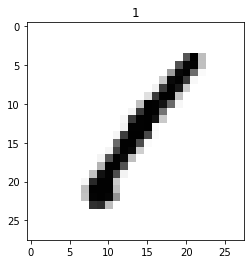

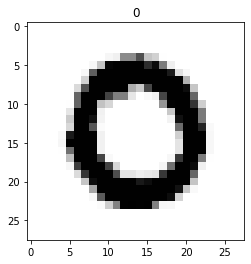

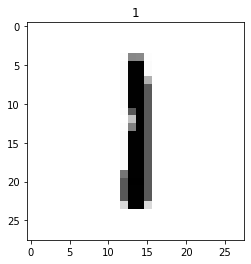

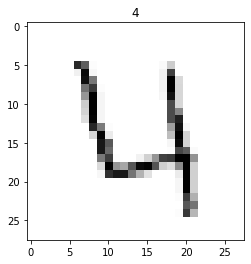

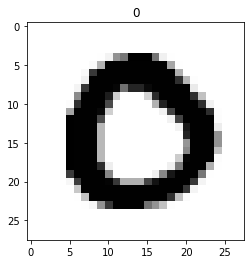

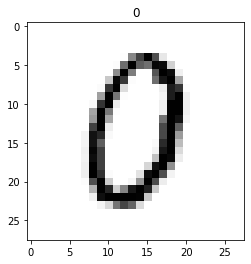

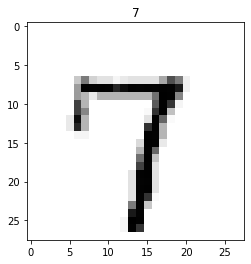

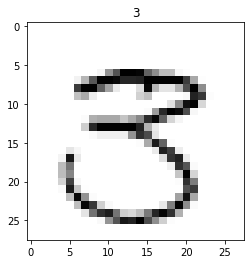

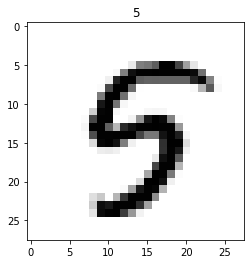

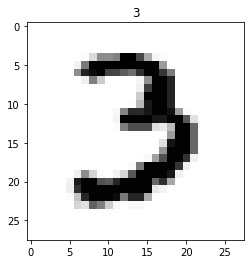

In [6]:
for i in range(0, 10):  # Looping through the first 4 rows of the training data.
    plt.imshow(cols_data[i], cmap=plt.get_cmap('Greys'))  # matplotlib.pyplot.imshow(X, cmap=('color'))
    plt.title(digits_data[i])  # Add the actual handwritten digit name as the title.
    plt.show();

### Splitting training data into training and validation data. 

In [7]:
# Splitting the orginial training data into training and test data for model training.
cols_train, cols_test, digits_train, digits_test = train_test_split(cols_data, digits_data, test_size=0.1, random_state=42)
print("cols_train shape:", cols_train.shape)
print("digits_train shape:", digits_train.shape)
print("cols_test shape:", cols_test.shape)
print("digits_test shape:", digits_test.shape)

cols_train shape: (37800, 28, 28)
digits_train shape: (37800,)
cols_test shape: (4200, 28, 28)
digits_test shape: (4200,)


### Initial investigation of models using Lazy Classifier. 

My initial research more than hinted at the success of CNNs in computer vision problems. I knew I wanted to implement that algorithm, but I did not initially know what algorithms to compare to it. Once the data was ready, I used the lazyclassifier library to determine which machine learning methods are worth investigating father.

In [281]:
#Reshaping into 2 dimentional data. 
d2_cols_train = cols_train.reshape((37800,784))
d2_cols_test = cols_test.reshape((4200,784))

reshaped_cols_train = cols_train.reshape((37800,28,28,1))
reshaped_cols_test = cols_test.reshape((4200,28,28,1))
reshaped_cols_data = cols_data.reshape((42000,28,28,1))

# Orginial full training data
d2_cols_data = cols_data.reshape(42000,784)

# Orginial full test data
d2_final_test = final_test.reshape(28000, 784)

# Convert digits to binary.
binary_train = keras.utils.to_categorical(digits_train, 10) # Train data digits
binary_test = keras.utils.to_categorical(digits_test, 10) # Validation data digits
binary_data = keras.utils.to_categorical(digits_data, 10) # Full data digits


In [18]:
#Using lazyclassifier to run 27 models. 
clf = LazyClassifier(verbose=0) #,ignore_warnings=True
models, predictions = clf.fit(d2_cols_train, d2_cols_test, digits_train, digits_test)
models

100%|███████████████████████████████████████████████████████████████████████████████| 29/29 [1:17:26<00:00, 160.21s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.98,0.98,None,0.98,197.74
LGBMClassifier,0.97,0.97,None,0.97,52.77
ExtraTreesClassifier,0.97,0.97,None,0.97,24.47
RandomForestClassifier,0.96,0.96,None,0.96,23.04
SVC,0.96,0.96,None,0.96,420.91
KNeighborsClassifier,0.95,0.95,None,0.95,108.36
BaggingClassifier,0.93,0.93,None,0.93,63.39
LogisticRegression,0.91,0.91,None,0.91,10.24
SGDClassifier,0.90,0.90,None,0.91,180.36


Of the methods above that reported an accuracy of 90% or higher. I will look more into K Neighbors and Random Forest. I already have some familiarity with these so I will adjust their parameters to replicate, and potentially improve, the accuracy above. Then I will compare my final model for each against the one less familiar to me, CNN. In pursuit of the best parameters, I will run experiments on several parameters for each type of model. The model will be trained on 90% of the training data (37,800 digits) and validated with the remaining 10% (4,300 digits). Based on the results, a final model will be chosen for each: KNN, Random Forest, and CNN. 

### KNN

The two parameters I will be adjusting to decide on my final KNN model are the number of neighbors and weights.

Tested n_neighbors - 
Values from 1 to 10: 1 to 10 neighbors  considered

Tested weights -
‘uniform’: points in the full neighborhood are weighted equally
‘distance’: closer neighbors of a query point will have a greater influence

I did not run this expirement 5 times and take the average for more true train and prediction time values due to the significant amount of time required to predict using KNN.

#### Experiment to Determine the K Value and Weight in the Final Model

In [ ]:
k_range = range(1, 11)

scores_uniform_final=[]
train_times_uniform_final=[]
pred_time_uniform_final=[]

for k in k_range:
    
    t0 = time.time()
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    knn.fit(d2_cols_train, digits_train)
    
    t1 = time.time()
    predicted = knn.predict(d2_cols_test)
    t2 = time.time()   
    
    scores_uniform_final.append(round(metrics.accuracy_score(digits_test, predicted),4))
    train_times_uniform_final.append(round(t1 - t0, 2))   
    pred_time_uniform_final.append(round(t2 - t1, 2))  
    
print("Accuracy score:" ,scores_uniform_final)
print("Seconds to train:" ,train_times_uniform_final)
print("Seconds to predict:" ,pred_time_uniform_final)

In [128]:
# Saving values so the expirement doesn't have to be run again.
scores_uniform_final=[0.9683, 0.9633, 0.9676, 0.9652, 0.9655, 0.9662, 0.9648, 0.9633, 0.9617, 0.961]
train_times_uniform_final=[17.31, 15.7, 15.83, 16.97, 15.76, 15.65, 15.69, 15.47, 15.88, 16.43]
pred_time_uniform_final=[247.37, 222.27, 225.63, 249.3, 216.29, 230.36, 239.3, 233.93, 250.89, 223.16]

In [ ]:
k_range = range(1, 11)

scores_distance_final=[]
train_times_distance_final=[]
pred_time_distance_final=[]

for k in k_range:
    
    t0 = time.time()
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn.fit(d2_cols_train, digits_train)
    
    t1 = time.time()
    predicted = knn.predict(d2_cols_test)
    t2 = time.time()   
    
    scores_distance_final.append(round(metrics.accuracy_score(digits_test, predicted),4))
    train_times_distance_final.append(round(t1 - t0, 2))   
    pred_time_distance_final.append(round(t2 - t1, 2))  
    
print("Accuracy score:" ,scores_distance_final)
print("Seconds to train:" ,train_times_distance_final)
print("Seconds to predict:" ,pred_time_distance_final)

In [127]:
# Saving values so the expirement doesn't have to be run again.
k_range = range(1, 11)
scores_distance_final=[0.9683, 0.9683, 0.9695, 0.9702, 0.9664, 0.9688, 0.9655, 0.9657, 0.9643, 0.9629]
train_times_distance_final=[16.36, 15.31, 15.41, 15.68, 15.08, 14.81, 14.86, 14.85, 14.65, 14.66]
pred_time_distance_final=[238.49, 221.96, 229.36, 230.01, 199.87, 199.79, 199.53, 202.7, 200.06, 202.66]

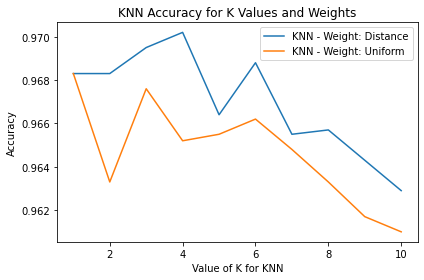

In [332]:
plt.title('KNN Accuracy for K Values and Weights')
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')

plt.plot(k_range, scores_distance_final, label = "KNN - Weight: Distance")
plt.plot(k_range, scores_uniform_final, label = "KNN - Weight: Uniform")


plt.legend()
plt.tight_layout()

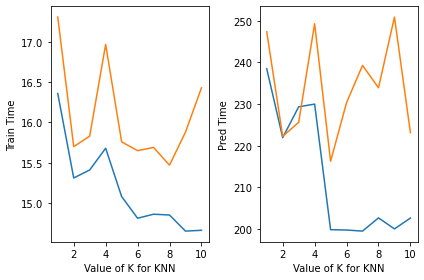

In [326]:
plt.subplot(1, 2, 1)
plt.xlabel('Value of K for KNN')
plt.ylabel('Train Time')

plt.plot(k_range, train_times_distance_final, label = "Train - Weight: Distance")
plt.plot(k_range, train_times_uniform_final, label = "Train - Weight: Uniform")

plt.subplot(1, 2, 2)
plt.xlabel('Value of K for KNN')
plt.ylabel('Pred Time')

plt.plot(k_range, pred_time_distance_final, label = "Prediction - Weight: Distance")
plt.plot(k_range, pred_time_uniform_final, label = "Prediction - Weight: Uniform")

plt.tight_layout()
plt.show()

#### Final KNN Model

In [336]:
confusion_digit_prediction = knn.predict(d2_cols_test)

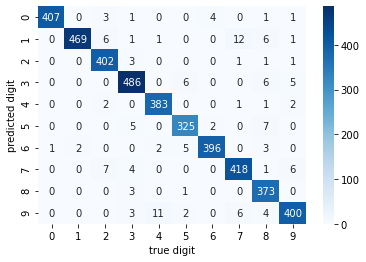

In [345]:
from sklearn.metrics import confusion_matrix

import seaborn as sns

matrix=confusion_matrix(digits_test,confusion_digit_prediction)

sns.heatmap(matrix.T, annot=True, fmt='d', cmap="Blues")

plt.xlabel('predicted digit')
plt.ylabel('true digit')
plt.show()

Model with all the training data

In [23]:
knn = KNeighborsClassifier(n_neighbors=4, weights='distance')
knn.fit(d2_cols_data, digits_data)
filename = 'knn_v1.sav'
pickle.dump(knn, open(filename, 'wb'))
digit_prediction = knn.predict(d2_final_test)
digit_prediction_df = pd.DataFrame(digit_prediction, columns=['Label'])
digit_prediction_df['ImageId'] = range(1, 1+len(digit_prediction_df))
digit_prediction_df.to_csv('KNNpredictioncsvfile.csv',index=False)

KNeighborsClassifier(n_neighbors=4, weights='distance')

Summary for KNN model: KNN is slow to make predictions because it doesn't generalize over data in advance. Instead, it has to refer to a historical database for each prediction.

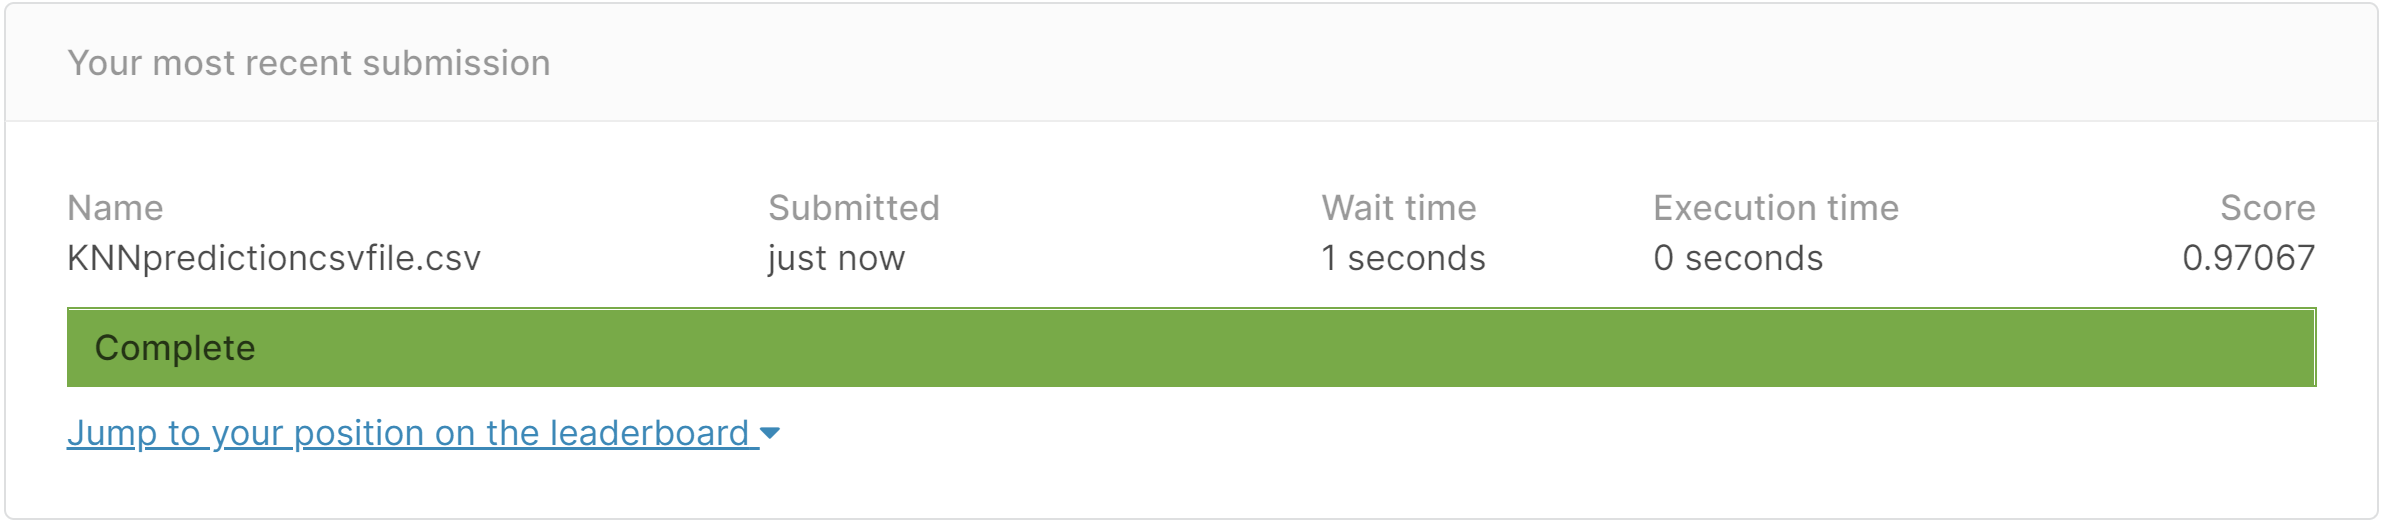

In [35]:
Image(filename='KNNKaggleScore.png')

### Random Forest

The two parameters I will be adjusting to decide on my final Random Forest model are the number of estimators and max_features.

Tested n_estimators - (number of trees in the forest)

100, 300, 500, 700, 900, 1100, and 1300

Tested max_features - (number of features to consider when looking for the best split)

“auto”: max_features=sqrt(n_features).

“log2”: max_features=log2(n_features).


#### Experiment to Determine the Number of Estimators in the Final Model

In [156]:
n_vals = [100, 300, 500, 700, 900, 1100, 1300, 1500, 1700, 1900, 2100]

scores_nvals = []
train_times_nvals = []
pred_times_nvals = []
    
for n in n_vals:
    
    scores_n = []
    train_times_n = []
    pred_times_n = []
    
    j=0
    
    for j in range(0,5):
    
        t0 = time.time()
        rfc = RandomForestClassifier(n_estimators = n)
        rfc.fit(d2_cols_train, digits_train)
    
        t1 = time.time()
        predicted = rfc.predict(d2_cols_test)
        t2 = time.time()
    
        train_times_n.append(round(t1 - t0, 2))
        pred_times_n.append(round(t2 - t1, 2))    
    
        scores_n.append(round(metrics.accuracy_score(digits_test, predicted),4))
        
        j=j+1
        
    scores = sum(scores_n) / len(scores_n)
    train_times = sum(train_times_n) / len(train_times_n)   
    pred_times = sum(pred_times_n) / len(pred_times_n) 
        
    scores_nvals.append(scores)
    train_times_nvals.append(train_times)    
    pred_times_nvals.append(pred_times)    
              
    
print("Accuracy score:" ,scores_nvals)
print("Seconds to train:" ,train_times_nvals)
print("Seconds to predict:" ,pred_times_nvals)

Accuracy score: [0.96402, 0.96418, 0.9654799999999998, 0.96486, 0.96466, 0.9647600000000001, 0.96492, 0.96508, 0.9649999999999999, 0.96478, 0.96506]
Seconds to train: [19.716, 60.236000000000004, 97.662, 137.046, 189.882, 218.19, 256.88199999999995, 302.572, 338.46400000000006, 376.27599999999995, 415.68]
Seconds to predict: [0.128, 0.404, 0.64, 0.9259999999999999, 1.214, 1.6199999999999999, 1.936, 2.162, 2.46, 2.964, 3.2440000000000007]


In [ ]:
# Saving values so the expirement doesn't have to be run again.
scores_nvals=[0.96402, 0.96418, 0.9654799999999998, 0.96486, 0.96466, 0.9647600000000001, 0.96492, 0.96508, 0.9649999999999999, 0.96478, 0.96506]
train_times_nvals=[19.716, 60.236000000000004, 97.662, 137.046, 189.882, 218.19, 256.88199999999995, 302.572, 338.46400000000006, 376.27599999999995, 415.68]
pred_times_nvals=[0.128, 0.404, 0.64, 0.9259999999999999, 1.214, 1.6199999999999999, 1.936, 2.162, 2.46, 2.964, 3.2440000000000007]

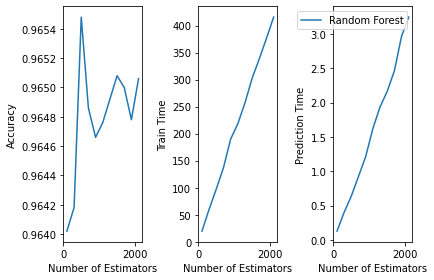

In [321]:
plt.subplot(1, 3, 1)
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')

plt.plot(n_vals, scores_nvals, label = "Random Forest")

plt.subplot(1, 3, 2)
plt.xlabel('Number of Estimators')
plt.ylabel('Train Time')

plt.plot(n_vals, train_times_nvals, label = "Random Forest")

plt.subplot(1, 3, 3)
plt.xlabel('Number of Estimators')
plt.ylabel('Prediction Time')

plt.plot(n_vals, pred_times_nvals, label = "Random Forest")

plt.legend()
plt.tight_layout()

I will choose n_estimators to be 500. Larger values do improve the accuracy but not enough to justify the increased train and prediction times. It is clear Random Forest will not get me close enough to my 99% accuracy goal, but I will see if adjusting the max_features has an impact. 

#### Experiment to Determine the Max_Features in the Final Model

In [161]:
scores_s = []
train_times_s = []
pred_times_s = []

# max_features = 'log2'

j=0

for j in range(0,5):

    t0 = time.time()
    rfc = RandomForestClassifier(n_estimators = 500, max_features = 'log2' )
    rfc.fit(d2_cols_train, digits_train)
    
    t1 = time.time()
    predicted = rfc.predict(d2_cols_test)
    t2 = time.time()
    
    train_times_s.append(round(t1 - t0, 2))
    pred_times_s.append(round(t2 - t1, 2))    
    
    scores_s.append(round(metrics.accuracy_score(digits_test, predicted),4))
    
    j=j+1

# Taking average of the scores and times

scores_log2 = sum(scores_s) / len(scores_s)
train_times_log2 = sum(train_times_s) / len(train_times_s)   
pred_times_log2 = sum(pred_times_s) / len(pred_times_s)  


In [162]:
scores_s = []
train_times_s = []
pred_times_s = []

# max_features = 'auto'

j=0

for j in range(0,5):

    t0 = time.time()
    rfc = RandomForestClassifier(n_estimators = 500, max_features = 'auto' )
    rfc.fit(d2_cols_train, digits_train)
    
    t1 = time.time()
    predicted = rfc.predict(d2_cols_test)
    t2 = time.time()
    
    train_times_s.append(round(t1 - t0, 2))
    pred_times_s.append(round(t2 - t1, 2))    
    
    scores_s.append(round(metrics.accuracy_score(digits_test, predicted),4))
    
    j=j+1
    
# Taking average of the scores and times

scores_auto = sum(scores_s) / len(scores_s)
train_times_auto = sum(train_times_s) / len(train_times_s)   
pred_times_auto = sum(pred_times_s) / len(pred_times_s) 

In [163]:
scores_s = []
train_times_s = []
pred_times_s = []

scores_s.extend((scores_auto, scores_log2))
train_times_s.extend((train_times_auto, train_times_log2))
pred_times_s.extend((pred_times_auto, pred_times_log2))

print("Accuracy score:" ,scores_s)
print("Seconds to train:" ,train_times_s)
print("Seconds to predict:" ,pred_times_s)

Accuracy score: [0.9651399999999999, 0.9617999999999999]
Seconds to train: [99.806, 39.668]
Seconds to predict: [0.7100000000000001, 0.778]


In [312]:
# Saving values so the expirement doesn't have to be run again.
max_features=['auto', 'log2']
scores_s=[0.9651399999999999, 0.9617999999999999]
train_times_s=[99.806, 39.668]
pred_times_s=[0.7100000000000001, 0.778]

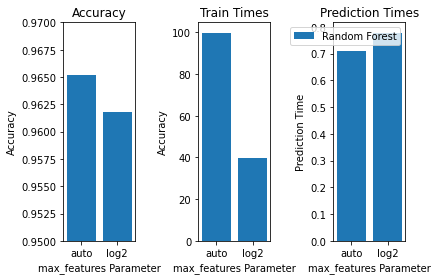

In [320]:
plt.subplot(1, 3, 1)
plt.title('Accuracy')
plt.xlabel('max_features Parameter')
plt.ylabel('Accuracy')
plt.axis([-.5, 1.5, .95, .97])

plt.bar(max_features,scores_s, label = "Random Forest")

plt.subplot(1, 3, 2)
max_features=['auto', 'log2']
plt.title('Train Times')
plt.xlabel('max_features Parameter')
plt.ylabel('Accuracy')

plt.bar(max_features,train_times_s, label = "Random Forest")

plt.subplot(1, 3, 3)
max_features=['auto', 'log2']
plt.title('Prediction Times')
plt.xlabel('max_features Parameter')
plt.ylabel('Prediction Time')

plt.bar(max_features,pred_times_s, label = "Random Forest")

plt.legend()
plt.tight_layout()

The sqrt slightly increases the accuracy and slightly decreases the train time without impacting the prediction time much so I will use max_features = 'auto' (same as max_features = 'sqrt') for my final model. 

#### Final Random Forest Model

In [348]:
rfc = RandomForestClassifier(n_estimators = 500, max_features = 'sqrt' )
rfc.fit(d2_cols_train, digits_train)
confusion_digit_prediction_rfc = rfc.predict(d2_cols_test)

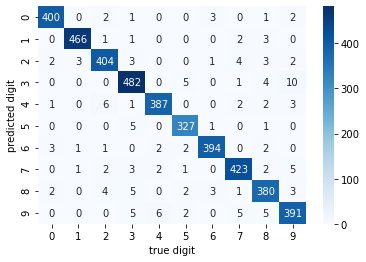

In [349]:
matrix=confusion_matrix(digits_test,confusion_digit_prediction_rfc)

sns.heatmap(matrix.T, annot=True, fmt='d', cmap="Blues")

plt.xlabel('predicted digit')
plt.ylabel('true digit')
plt.show()

Model with all the training data.

In [172]:
rfc = RandomForestClassifier(n_estimators = 500, max_features = 'sqrt' )
rfc.fit(d2_cols_data, digits_data)

filename = 'rfc_v1.sav'
pickle.dump(rfc, open(filename, 'wb'))

digit_prediction = rfc.predict(d2_final_test)
digit_prediction_df = pd.DataFrame(digit_prediction, columns=['Label'])
digit_prediction_df['ImageId'] = range(1, 1+len(digit_prediction_df))
digit_prediction_df.to_csv('rfcpredictioncsvfile.csv',index=False)

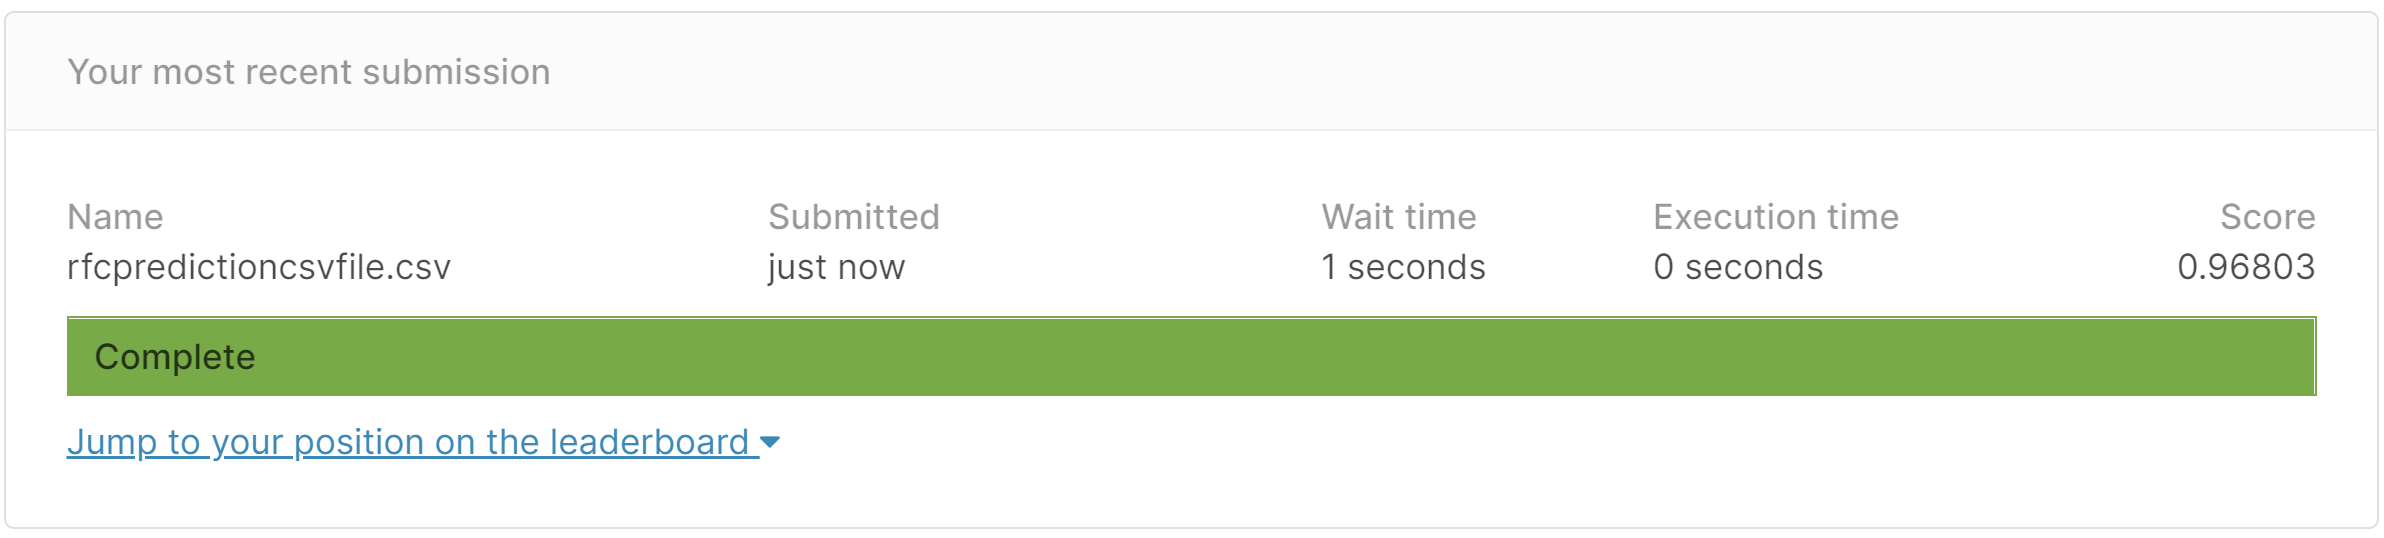

In [94]:
Image(filename='rfcKaggleScore.png')

## Convolutional Neural Network (CNN) is a class of deep neural networks often used for computer vision. 

Very first CNN model. The parameters were chosen in a vaguely educated fashion. The purpose of this model is to see if I can get a model to run. The structure will be adjusted from there.

In [8]:
model = Sequential()
model.add(Reshape((28, 28, 1)))
# First convolutional layer.
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
# Second convolutional layer.
model.add(Conv2D(32, kernel_size=3, activation='relu')) # ReLU is non-linear meaning it allows for learning of non-linear dynamics.
# Pooling.
model.add(MaxPooling2D(pool_size=(2, 2)))  # Pooling preserves the spacial awareness. Maxpooling is taking the maximum of the patch. Meanpooling is taking the mean.
# Flattening to a single vector.
model.add(Flatten())
model.add(Dense(10, activation='softmax'))


In [104]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [105]:
#Training the model. The test digits must first be converted to categorical.  
binary_train = keras.utils.to_categorical(digits_train, 10) # Convert to binary.
binary_test = keras.utils.to_categorical(digits_test, 10)
binary_data = keras.utils.to_categorical(digits_data, 10)

model.fit(cols_data, binary_data, 
          #validation_data=(cols_test, binary_test), 
          #used during development to get a sense of accuracy. Final model trains with add training data.
          epochs=3)

Epoch 1/3
1313/1313 [==============================] - 46s 34ms/step - loss: 0.3437 - accuracy: 0.8950
Epoch 2/3
1313/1313 [==============================] - 45s 35ms/step - loss: 0.0547 - accuracy: 0.9831
Epoch 3/3
1313/1313 [==============================] - 44s 33ms/step - loss: 0.0371 - accuracy: 0.9883


In [106]:
model.save('cnn_v1.hdf5')
digit_prediction = model.predict_classes(final_test)

digit_prediction_df = pd.DataFrame(digit_prediction, columns=['Label'])
digit_prediction_df['ImageId'] = range(1, 1+len(digit_prediction_df))

digit_prediction_df.to_csv('predictioncsvfile.csv',index=False)

Accuracy: 0.98139

### Determining Number of Convolutional Layers

First, let's determine a starting point for the number of convoutional layers. We'll test using 1, 2, and 3 to determine and educated choice moving forward.

In [ ]:
#The test digits must first be converted to categorical.  
binary_train = keras.utils.to_categorical(digits_train, 10) # Convert to binary.
binary_test = keras.utils.to_categorical(digits_test, 10)
binary_data = keras.utils.to_categorical(digits_data, 10)

#### 1 Convolutional Layer

In [140]:
model = Sequential()
model.add(Reshape((28, 28, 1)))
# First convolutional layer.
model.add(Conv2D(24, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
# Pooling.
model.add(MaxPooling2D())  # Pooling preserves the spacial awareness. Maxpooling is taking the maximum of the patch. Meanpooling is taking the mean.
# Flattening to a single vector.
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Training the model. 
history = model.fit(cols_train, binary_train, 
          validation_data=(cols_test, binary_test), 
          #used during development to get a sense of accuracy. Final model trains with add training data.
          epochs=20)

Epoch 1/20
1182/1182 [==============================] - 37s 30ms/step - loss: 0.3506 - accuracy: 0.8925 - val_loss: 0.0782 - val_accuracy: 0.9781
Epoch 2/20
1182/1182 [==============================] - 34s 29ms/step - loss: 0.0576 - accuracy: 0.9827 - val_loss: 0.0586 - val_accuracy: 0.9805
Epoch 3/20
1182/1182 [==============================] - 38s 32ms/step - loss: 0.0328 - accuracy: 0.9896 - val_loss: 0.0725 - val_accuracy: 0.9769
Epoch 4/20
1182/1182 [==============================] - 39s 33ms/step - loss: 0.0218 - accuracy: 0.9925 - val_loss: 0.0637 - val_accuracy: 0.9786
Epoch 5/20
1182/1182 [==============================] - 40s 33ms/step - loss: 0.0116 - accuracy: 0.9964 - val_loss: 0.0743 - val_accuracy: 0.9817
Epoch 6/20
1182/1182 [==============================] - 38s 32ms/step - loss: 0.0089 - accuracy: 0.9970 - val_loss: 0.0672 - val_accuracy: 0.9810
Epoch 7/20
1182/1182 [==============================] - 39s 33ms/step - loss: 0.0063 - accuracy: 0.9982 - val_loss: 0.0781 -

In [141]:
model1_epochs=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
model1_accuracy = history.history['accuracy']
model1_val_accuracy = history.history['val_accuracy']
model1_loss = history.history['loss']
model1_val_loss = history.history['val_loss']

In [9]:
# Saving values so experiment doesn't have to be run again.
model1_epochs=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
model1_accuracy = [0.945449709892273, 0.9821428656578064, 0.989126980304718,0.9920899271965027,0.995555579662323,0.9968783259391785,0.9980158805847168,0.9979629516601562,0.9978836178779602,0.9982275366783142,0.9990211725234985,0.9985449910163879,0.9993386268615723,0.9993915557861328,0.9983333349227905,0.9995238184928894,0.9997618794441223,0.9986507892608643,0.99949735403060910,0.99957674741745]
model1_val_accuracy = [0.9780952334403992,0.9804762005805969,0.9769047498703003,0.9785714149475098,0.9816666841506958,0.9809523820877075,0.9828571677207947,0.9842857122421265,0.9847618937492371,0.9840475916862488,0.9819047451019287,0.982619047164917,0.9800000190734863,0.9840475916862488,0.9833333492279053,0.9864285588264465,0.9854761958122253,0.9816666841506958,0.9838095307350159,0.9835714101791382]
model1_loss = [0.18102151155471802,0.05821917578577995,0.03396165743470192,0.02282058075070381,0.01418149471282959,0.009640452452003956,0.0063911257311701775,0.006748441606760025,0.006351220887154341,0.005145985167473555,0.003054813016206026,0.005150925368070602,0.0022503978107124567,0.002000381937250495,0.005174964666366577,0.0015509850345551968,0.0011573064839467406,0.004082964267581701,0.0019061149796471,0.0019318159902468324]
model1_val_loss = [0.07822278141975403,0.05861301347613335,0.07247930020093918,0.0636686161160469,0.07433998584747314,0.06717102229595184,0.07805266976356506,0.0687684565782547,0.06689582765102386,0.07160742580890656,0.10416632145643234,0.07947400212287903,0.0941307544708252,0.08319304138422012,0.0926206111907959,0.0834515243768692,0.08437702804803848,0.09958258271217346,0.08675272762775421,0.09748738259077072]

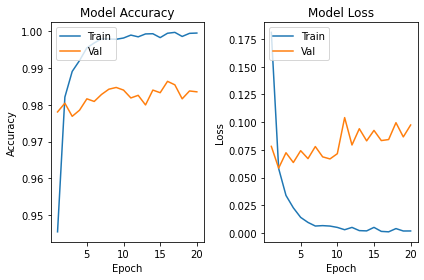

In [319]:
plt.subplot(1, 2, 1)

plt.plot(model1_epochs,model1_accuracy)
plt.plot(model1_epochs,model1_val_accuracy)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.subplot(1, 2, 2)

plt.plot(model1_epochs,model1_loss)
plt.plot(model1_epochs,model1_val_loss)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.tight_layout()

#### 2 Convolutional Layers

In [144]:
model = Sequential()
model.add(Reshape((28, 28, 1)))
# First convolutional layer.
model.add(Conv2D(24, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
# Pooling.
model.add(MaxPooling2D())  # Pooling preserves the spacial awareness. Maxpooling is taking the maximum of the patch. Meanpooling is taking the mean.
# First convolutional layer.
model.add(Conv2D(48, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
# Pooling.
model.add(MaxPooling2D())  # Pooling preserves the spacial awareness. Maxpooling is taking the maximum of the patch. Meanpooling is taking the mean.
# Flattening to a single vector.
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(cols_train, binary_train, 
          validation_data=(cols_test, binary_test), 
          #used during development to get a sense of accuracy. Final model trains with add training data.
          epochs=20)

Epoch 1/20
1182/1182 [==============================] - 39s 32ms/step - loss: 0.3651 - accuracy: 0.8847 - val_loss: 0.0614 - val_accuracy: 0.9807
Epoch 2/20
1182/1182 [==============================] - 34s 28ms/step - loss: 0.0502 - accuracy: 0.9847 - val_loss: 0.0455 - val_accuracy: 0.9850
Epoch 3/20
1182/1182 [==============================] - 39s 33ms/step - loss: 0.0309 - accuracy: 0.9901 - val_loss: 0.0437 - val_accuracy: 0.9869
Epoch 4/20
1182/1182 [==============================] - 40s 34ms/step - loss: 0.0228 - accuracy: 0.9926 - val_loss: 0.0328 - val_accuracy: 0.9907
Epoch 5/20
1182/1182 [==============================] - 40s 34ms/step - loss: 0.0176 - accuracy: 0.9940 - val_loss: 0.0440 - val_accuracy: 0.9855
Epoch 6/20
1182/1182 [==============================] - 41s 35ms/step - loss: 0.0133 - accuracy: 0.9958 - val_loss: 0.0381 - val_accuracy: 0.9886
Epoch 7/20
1182/1182 [==============================] - 41s 34ms/step - loss: 0.0095 - accuracy: 0.9967 - val_loss: 0.0535 -

In [145]:
model2_epochs=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
model2_accuracy = history.history['accuracy']
model2_val_accuracy = history.history['val_accuracy']
model2_loss = history.history['loss']
model2_val_loss = history.history['val_loss']

In [6]:
model2_accuracy = [0.9481216669082642,0.9838359951972961,0.9889682531356812,0.9923015832901001,0.9943650960922241,0.994867742061615,0.9963492155075073,0.9966402053833008,0.9973809719085693,0.9974603056907654,0.9983068704605103,0.9984920620918274,0.9981481432914734,0.9989417791366577,0.9978571534156799,0.9984920620918274,0.999656081199646,0.9983333349227905,0.9991269707679749,0.9985714554786682]
model2_val_accuracy = [0.9807142615318298,0.9850000143051147,0.9869047403335571,0.9907143115997314,0.9854761958122253,0.9885714054107666,0.9840475916862488,0.9859523773193359,0.991190493106842,0.9900000095367432,0.9885714054107666,0.9876190423965454,0.9892857074737549,0.9904761910438538,0.9895238280296326,0.9885714054107666,0.9878571629524231,0.9883333444595337,0.991190493106842,0.9919047355651855]
model2_loss = [0.1657993495464325,0.05154530331492424,0.03473620489239693,0.024304404854774475,0.017870279029011726,0.014826505444943905,0.011189439333975315,0.009625181555747986,0.007393757812678814,0.007668152451515198,0.005230557173490524,0.004411360248923302,0.0054412889294326305,0.00307286623865366,0.007312921807169914,0.004108799155801535,0.0011476367944851518,0.0048188879154622555,0.002626146888360381,0.004248512908816338]
model2_val_loss = [0.061436645686626434,0.04550127312541008,0.043698281049728394,0.032775335013866425,0.0440167561173439,0.038145631551742554,0.05346497520804405,0.043346840888261795,0.0362345390021801,0.04050539433956146,0.053078316152095795,0.043788254261016846,0.045500628650188446,0.04701985791325569,0.04856036230921745,0.045047082006931305,0.06113932281732559,0.05492443963885307,0.04375675693154335,0.0488455556333065]

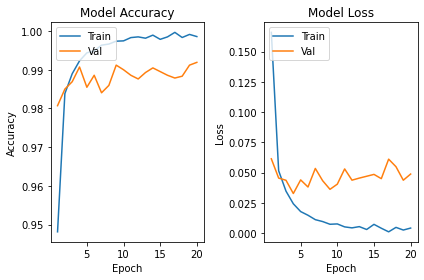

In [318]:
plt.subplot(1, 2, 1)
plt.plot(model2_epochs,model2_accuracy)
plt.plot(model2_epochs,model2_val_accuracy)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(model2_epochs,model2_loss)
plt.plot(model2_epochs,model2_val_loss)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.tight_layout()

#### 3 Convolutional Layers

In [149]:
model = Sequential()
model.add(Reshape((28, 28, 1)))
# First convolutional layer.
model.add(Conv2D(24, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
# Pooling.
model.add(MaxPooling2D())  # Pooling preserves the spacial awareness. Maxpooling is taking the maximum of the patch. Meanpooling is taking the mean.
# First convolutional layer.
model.add(Conv2D(48, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
# Pooling.
model.add(MaxPooling2D())  # Pooling preserves the spacial awareness. Maxpooling is taking the maximum of the patch. Meanpooling is taking the mean.
# First convolutional layer.
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
# Pooling.
model.add(MaxPooling2D(padding='same'))  # Pooling preserves the spacial awareness. Maxpooling is taking the maximum of the patch. Meanpooling is taking the mean.
# Flattening to a single vector.
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(cols_train, binary_train, 
          validation_data=(cols_test, binary_test), 
          #used during development to get a sense of accuracy. Final model trains with add training data.
          epochs=20)

Epoch 1/20
1182/1182 [==============================] - 13s 11ms/step - loss: 0.4214 - accuracy: 0.8639 - val_loss: 0.0911 - val_accuracy: 0.9724
Epoch 2/20
1182/1182 [==============================] - 12s 10ms/step - loss: 0.0565 - accuracy: 0.9819 - val_loss: 0.0498 - val_accuracy: 0.9845
Epoch 3/20
1182/1182 [==============================] - 11s 10ms/step - loss: 0.0352 - accuracy: 0.9895 - val_loss: 0.0822 - val_accuracy: 0.9736
Epoch 4/20
1182/1182 [==============================] - 12s 10ms/step - loss: 0.0291 - accuracy: 0.9903 - val_loss: 0.0527 - val_accuracy: 0.9829
Epoch 5/20
1182/1182 [==============================] - 11s 10ms/step - loss: 0.0218 - accuracy: 0.9932 - val_loss: 0.0457 - val_accuracy: 0.9848
Epoch 6/20
1182/1182 [==============================] - 11s 10ms/step - loss: 0.0172 - accuracy: 0.9946 - val_loss: 0.0503 - val_accuracy: 0.9860
Epoch 7/20
1182/1182 [==============================] - 12s 10ms/step - loss: 0.0157 - accuracy: 0.9946 - val_loss: 0.0450 -

In [150]:
model3_epochs=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
model3_accuracy = history.history['accuracy']
model3_val_accuracy = history.history['val_accuracy']
model3_loss = history.history['loss']
model3_val_loss = history.history['val_loss']

In [5]:
model3_epochs=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
model3_accuracy = [0.94306880235672, 0.9831481575965881, 0.9890211820602417, 0.9900529384613037, 0.9928571581840515, 0.993915319442749, 0.9946296215057373, 0.9950793385505676, 0.9957143068313599, 0.9969576597213745, 0.9973545074462891, 0.9969311952590942, 0.9968783259391785, 0.9980688095092773, 0.9970105886459351, 0.9981216788291931, 0.9967724680900574, 0.9983068704605103, 0.9980952143669128, 0.9981216788291931]
model3_val_accuracy = [0.9723809361457825, 0.9845238327980042, 0.9735714197158813, 0.9828571677207947, 0.9847618937492371, 0.9859523773193359, 0.9876190423965454, 0.9883333444595337, 0.9897618889808655, 0.9871428608894348, 0.9866666793823242, 0.9866666793823242, 0.9885714054107666, 0.9895238280296326, 0.988095223903656, 0.9895238280296326, 0.9900000095367432, 0.9897618889808655, 0.9859523773193359, 0.9904761910438538]
model3_loss = [0.1784721165895462, 0.05447157844901085, 0.03726476430892944, 0.03040820173919201, 0.02360614761710167, 0.01960938237607479, 0.016431273892521858, 0.0152397146448493, 0.012178337201476097, 0.009281862527132034, 0.009546274319291115, 0.009031584486365318, 0.00985037162899971, 0.005775575526058674, 0.009841591119766235, 0.005948688369244337, 0.010184045881032944, 0.0053340718150138855, 0.006711961235851049, 0.005547710228711367]
model3_val_loss = [0.0910731703042984, 0.04983987659215927, 0.08216340094804764, 0.052683766931295395, 0.04574941098690033, 0.050288788974285126, 0.04504891112446785, 0.05278941988945007, 0.03639855980873108, 0.04973268881440163, 0.05424085631966591, 0.06290245801210403, 0.04366762191057205, 0.05468112230300903, 0.056525055319070816, 0.05862319469451904, 0.051908642053604126, 0.04492877796292305, 0.08316992223262787, 0.05669976398348808]

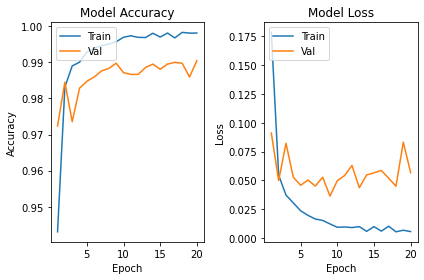

In [305]:
plt.subplot(1, 2, 1)
plt.plot(model3_epochs,model3_accuracy)
plt.plot(model3_epochs,model3_val_accuracy)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')


plt.subplot(1, 2, 2)
plt.plot(model3_epochs,model3_loss)
plt.plot(model3_epochs,model3_val_loss)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.tight_layout()

### Comparing Accuracy

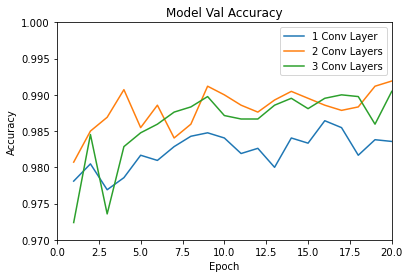

In [10]:
plt.plot(model1_epochs,model1_val_accuracy)
plt.plot(model1_epochs,model2_val_accuracy)
plt.plot(model1_epochs,model3_val_accuracy)
plt.title('Model Val Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['1 Conv Layer', '2 Conv Layers', '3 Conv Layers'], loc='bottom right')
plt.axis([0, 20, .97, 1])
plt.rcParams["figure.figsize"] = [12,8]
plt.show()

Comparing the each accuracy, 2 convolutional layers seems to be sufficient. I will move on to perform more tests with 2 convolutional layers. Note that the validation accuracy can be seen going stagnant with increasing epoch. This points to some potential overfitting and will need to be investigated. 

### Determining Hyperparameters

Now I will use the keras tuner to determine the parameters for my final model. Since I noticed some increase in val loss in the pervious test, I will add in dropout layers.

In [257]:
def model_builder_with_dropout(hp):
    model = keras.Sequential([
        
    keras.layers.Conv2D(
          filters = hp.Int('Convolutional_1_Filter', min_value=32, max_value=512, step=8),
          kernel_size=hp.Choice('Convolutional_1_Kernal',values=[3,5]),
          activation='relu',
          input_shape=(28, 28, 1)),
    
    keras.layers.MaxPooling2D(),
        
    keras.layers.Dropout(rate=hp.Float('dropout_1',min_value=0.0,max_value=0.5,default=0.25,step=0.05,
            )), 
      
    keras.layers.Conv2D(
          filters = hp.Int('Convolutional_2_Filter', min_value=32, max_value=512, step=8),
          kernel_size=hp.Choice('Convolutional_2_Kernal',values=[3,5]),
          activation='relu'),
        
    keras.layers.MaxPooling2D(),
        
    keras.layers.Dropout(rate=hp.Float('dropout_2', min_value=0.0, max_value=0.5, default=0.25, step=0.05,
            )), 
      
    keras.layers.Flatten(),
      
    keras.layers.Dense( units=hp.Int('Dense_Units_1', min_value=32, max_value=512, step=8), activation='relu'),
      
    keras.layers.Dense(10, activation='softmax')
      
  ]) 

      # Tune the learning rate for the optimizer
      # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

    return model

In [265]:
tuner_with_dropout = kt.Hyperband(model_builder_with_dropout,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='cnn_digits')

In [262]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=0)

In [266]:
#from tensorflow.compat.v1 import ConfigProto
#from tensorflow.compat.v1 import InteractiveSession

#config = ConfigProto()
#config.gpu_options.allow_growth = True
#session = InteractiveSession(config=config)


# digits data cannot be binary, must be integers 

tuner_with_dropout.search(reshaped_cols_train, digits_train, validation_data=(reshaped_cols_test, digits_test), epochs=10, callbacks=[stop_early])

Trial 30 Complete [01h 00m 18s]
val_accuracy: 0.991428554058075

Best val_accuracy So Far: 0.991428554058075
Total elapsed time: 03h 23m 09s
INFO:tensorflow:Oracle triggered exit


In [267]:
tunermodel2=tuner_with_dropout.get_best_models(num_models=1)[0]

In [268]:
tunermodel2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 424)       4240      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 424)       0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 424)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 464)         4918864   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 464)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 464)         0         
_________________________________________________________________
flatten (Flatten)            (None, 7424)              0

#### Model Using Above Best Hyperparameters 

In [272]:
model5 = Sequential()
model5.add(Reshape((28, 28, 1)))
# First convolutional layer.
model5.add(Conv2D(424, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
# Pooling.
model5.add(MaxPooling2D())  
# Pooling preserves the spacial awareness. Maxpooling is taking the maximum of the patch. Meanpooling is taking the mean.
model5.add(Dropout(rate=0.45))
# Second convolutional layer.
model5.add(Conv2D(464, kernel_size=5, activation='relu', input_shape=(28, 28, 1)))
# Pooling.
model5.add(MaxPooling2D()) 
model5.add(Dropout(rate=0.4))
# Flattening to a single vector.
model5.add(Flatten())
model5.add(Dense(464, activation='relu'))
model5.add(Dense(10, activation='softmax'))

hp_learning_rate = 0.0001

model5.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

#Training the model. The test digits must first be converted to categorical.  

history = model5.fit(reshaped_cols_train, digits_train, validation_data=(reshaped_cols_test, digits_test), 
          #used during development to get a sense of accuracy. Final model trains with add training data.
          epochs=20)

Epoch 1/20
1182/1182 [==============================] - 406s 343ms/step - loss: 0.5127 - accuracy: 0.8409 - val_loss: 0.0935 - val_accuracy: 0.9707
Epoch 2/20
1182/1182 [==============================] - 407s 344ms/step - loss: 0.0728 - accuracy: 0.9776 - val_loss: 0.0535 - val_accuracy: 0.9829
Epoch 3/20
1182/1182 [==============================] - 419s 355ms/step - loss: 0.0466 - accuracy: 0.9853 - val_loss: 0.0419 - val_accuracy: 0.9857
Epoch 4/20
1182/1182 [==============================] - 434s 367ms/step - loss: 0.0343 - accuracy: 0.9880 - val_loss: 0.0404 - val_accuracy: 0.9876
Epoch 5/20
1182/1182 [==============================] - 417s 353ms/step - loss: 0.0301 - accuracy: 0.9911 - val_loss: 0.0333 - val_accuracy: 0.9898
Epoch 6/20
1182/1182 [==============================] - 407s 345ms/step - loss: 0.0199 - accuracy: 0.9938 - val_loss: 0.0343 - val_accuracy: 0.9876
Epoch 7/20
1182/1182 [==============================] - 416s 352ms/step - loss: 0.0202 - accuracy: 0.9933 - val_

In [273]:
model5_epochs=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
model5_accuracy = history.history['accuracy']
model5_val_accuracy = history.history['val_accuracy']
model5_loss = history.history['loss']
model5_val_loss = history.history['val_loss']

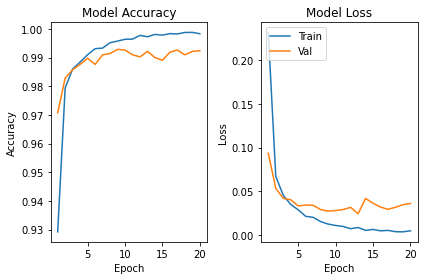

In [327]:
plt.subplot(1, 2, 1)

plt.plot(model5_epochs,model5_accuracy)
plt.plot(model5_epochs,model5_val_accuracy)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.subplot(1, 2, 2)

plt.plot(model5_epochs,model5_loss)
plt.plot(model5_epochs,model5_val_loss)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['Train', 'Val'], loc='upper left')
plt.tight_layout()

In [284]:
# Final model based on tuning to include all training data.
model5.fit(reshaped_cols_data, digits_data, epochs=9)

Epoch 1/9
1313/1313 [==============================] - 478s 364ms/step - loss: 0.0082 - accuracy: 0.9977
Epoch 2/9
1313/1313 [==============================] - 445s 339ms/step - loss: 0.0048 - accuracy: 0.9984
Epoch 3/9
1313/1313 [==============================] - 452s 344ms/step - loss: 0.0039 - accuracy: 0.9987
Epoch 4/9
1313/1313 [==============================] - 474s 361ms/step - loss: 0.0038 - accuracy: 0.9986
Epoch 5/9
1313/1313 [==============================] - 474s 361ms/step - loss: 0.0033 - accuracy: 0.9990
Epoch 6/9
1313/1313 [==============================] - 470s 358ms/step - loss: 0.0030 - accuracy: 0.9991
Epoch 7/9
1313/1313 [==============================] - 479s 365ms/step - loss: 0.0035 - accuracy: 0.9988
Epoch 8/9
1313/1313 [==============================] - 473s 360ms/step - loss: 0.0032 - accuracy: 0.9990
Epoch 9/9
1313/1313 [==============================] - 481s 366ms/step - loss: 0.0026 - accuracy: 0.9990


In [285]:
model5.save('cnn_v2.hdf5')
digit_prediction = model5.predict_classes(final_test)

digit_prediction_df = pd.DataFrame(digit_prediction, columns=['Label'])
digit_prediction_df['ImageId'] = range(1, 1+len(digit_prediction_df))

digit_prediction_df.to_csv('cnn_v2_predictioncsvfile.csv',index=False)

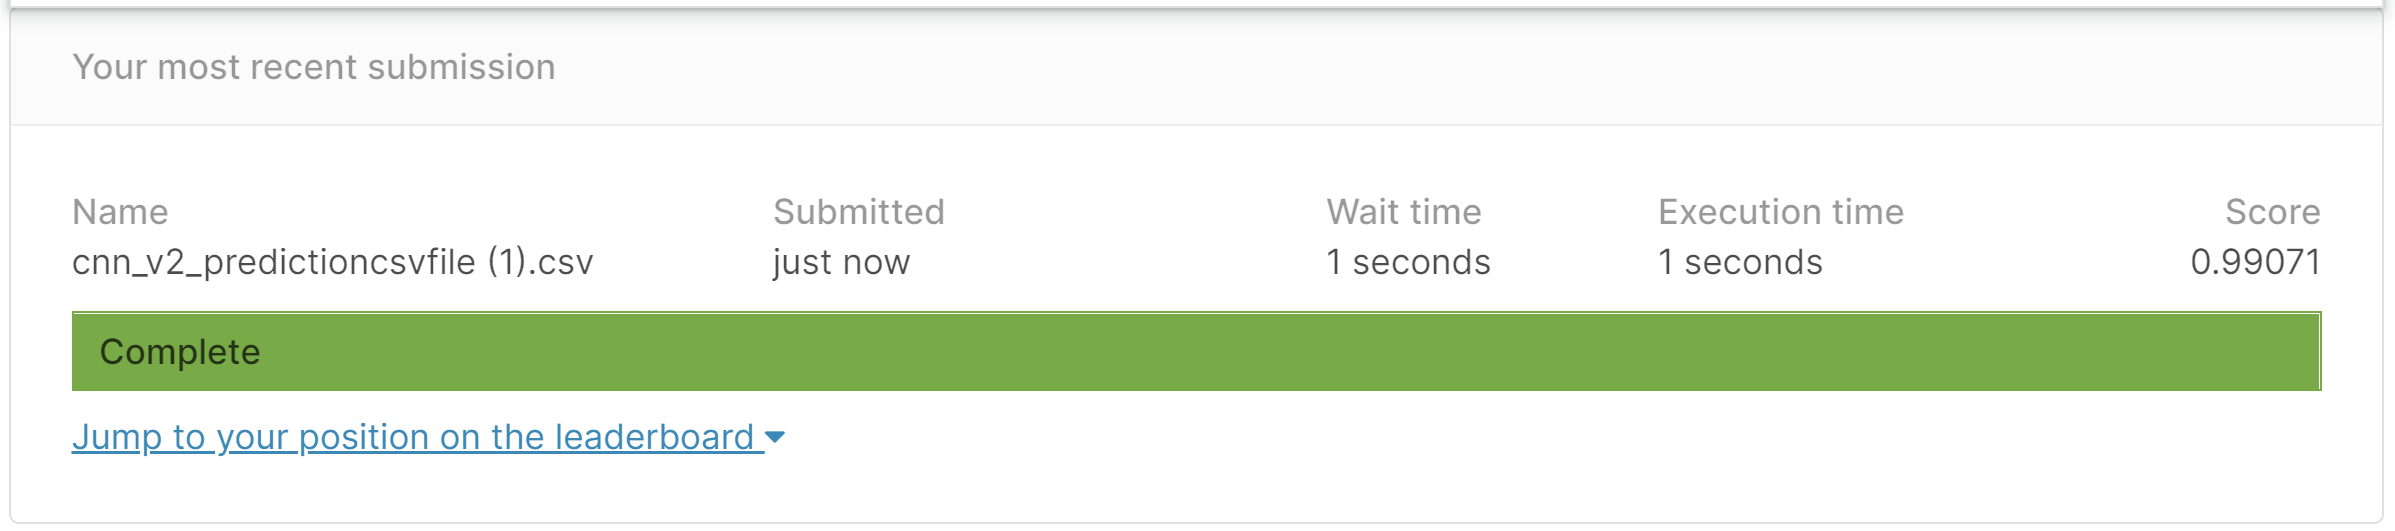

In [286]:
Image(filename='CNNfromtuner.png')

#### Data Augmentation 

As a final step, I decided to use data augmentation to increase the training data run through the CNN. Data augmentation allows for a different transformation of each image in each epoch. Since the model is run for 9 epochs, 9 different versions of each original image in the training set were used.

In [354]:
from keras.preprocessing.image import ImageDataGenerator

In [365]:
data_aug = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  # rotates images with the range 0 to 180 degrees
        zoom_range = 0.1, # zooms image 
        width_shift_range=0.1,  # shifts images horizontally 1/10 of total width
        height_shift_range=0.1,  # shifts images vertically 1/10 of the total height
        horizontal_flip=False,  
        # wouldn't want to flip the numbers as they could be missclassified for other numbers (like 6 and 9) which would not help the model.
        vertical_flip=False)  

data_aug.fit(reshaped_cols_data)

In [372]:
model5.fit(data_aug.flow(reshaped_cols_data, digits_data, batch_size=32),
          steps_per_epoch=len(cols_data) / 32, epochs=9)

Epoch 1/9
1312/1312 [==============================] - 503s 384ms/step - loss: 0.0590 - accuracy: 0.9810
Epoch 2/9
1312/1312 [==============================] - 491s 374ms/step - loss: 0.0455 - accuracy: 0.9862
Epoch 3/9
1312/1312 [==============================] - 487s 371ms/step - loss: 0.0435 - accuracy: 0.9863
Epoch 4/9
1312/1312 [==============================] - 487s 371ms/step - loss: 0.0370 - accuracy: 0.9887
Epoch 5/9
1312/1312 [==============================] - 487s 371ms/step - loss: 0.0354 - accuracy: 0.9890
Epoch 6/9
1312/1312 [==============================] - 487s 371ms/step - loss: 0.0331 - accuracy: 0.9891
Epoch 7/9
1312/1312 [==============================] - 487s 371ms/step - loss: 0.0312 - accuracy: 0.9902
Epoch 8/9
1312/1312 [==============================] - 489s 372ms/step - loss: 0.0305 - accuracy: 0.9909
Epoch 9/9
1312/1312 [==============================] - 504s 384ms/step - loss: 0.0299 - accuracy: 0.9909


In [373]:
digit_prediction = model5.predict_classes(final_test)

digit_prediction_df = pd.DataFrame(digit_prediction, columns=['Label'])
digit_prediction_df['ImageId'] = range(1, 1+len(digit_prediction_df))

digit_prediction_df.to_csv('cnn_v3_predictioncsvfile.csv',index=False)

In [375]:
model5.save('cnn_v3.hdf5')

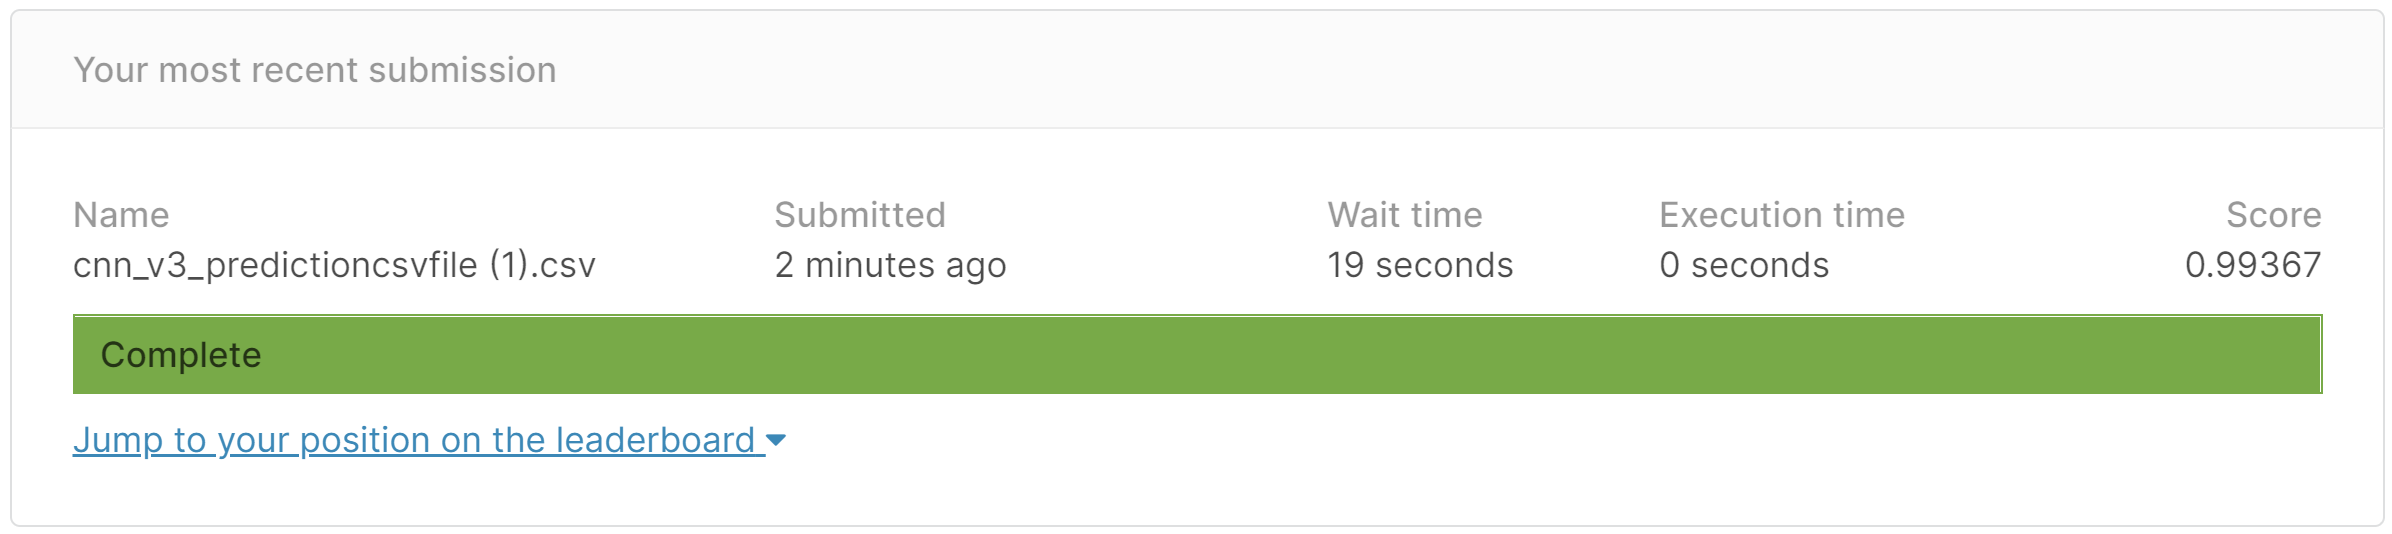

In [374]:
Image(filename='CNNKaggleScore_V2.png')

## Final Demo User Interface

In [12]:
#pip install gradio
import tensorflow as tf
import gradio
import gradio as gr
import os

model = tf.keras.models.load_model("cnn_v3.hdf5")

numbers=(0,1,2,3,4,5,6,7,8,9)

def recognize_digit(image):
    image = image.reshape(1, 28 ,28)
    prediction = model.predict(image).flatten()
    return {numbers[i]: float(prediction[i]) for i in range(10)}
       
iface = gr.Interface(
    recognize_digit, 
    gradio.inputs.Image(shape=(28, 28), image_mode='L', invert_colors=True, source="canvas"), 
    #"label",
    gradio.outputs.Label(num_top_classes=3),
    live=True,
    interpretation="default",
    #capture_session=True,
)

iface.test_launch()

if __name__ == "__main__":
    iface.launch()

Test launch: recognize_digit()... WARNING:tensorflow:Model was constructed with shape (None, None, None, None) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, None, None), dtype=tf.float32, name='reshape_1_input'), name='reshape_1_input', description="created by layer 'reshape_1_input'"), but it was called on an input with incompatible shape (None, 28, 28).
PASSED
Running locally at: http://127.0.0.1:7861/
To create a public link, set `share=True` in `launch()`.
Interface loading below...


## Referenced to Write Code

https://stackoverflow.com/questions/55994134/how-to-reshape-each-row-of-a-dataframe

https://stackoverflow.com/questions/42812230/why-plt-imshow-doesnt-display-the-image

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.max.html

https://www.codecademy.com/articles/normalization

https://numpy.org/doc/stable/reference/generated/numpy.reshape.html

https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html

https://stackoverflow.com/questions/9295026/matplotlib-plots-removing-axis-legends-and-white-spaces

https://www.youtube.com/watch?v=2-Ol7ZB0MmU

https://stackoverflow.com/questions/38862293/how-to-add-incremental-numbers-to-a-new-column-using-pandas/38862389

https://www.youtube.com/watch?v=AjtX1N_VT9E

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

https://keras.io/

https://realpython.com/python-csv/

https://techvidvan.com/tutorials/handwritten-digit-recognition-with-python-cnn/

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

https://www.gradio.app/